In [1]:
# from plotting_fns import *
from cross_spectrum_analysis import *
from halo_model import *
from helgason import *
from ciber_mocks import *
from plotting_fns import *
import seaborn as sns
sns.set()

In [2]:
flight=40030 
inst=1  #inst=1-I band magnitude,2-H band magnitude
ifield=4  #use the PSF in which CIBER field? 4-elat10,5-elat30,6-BootesB,7-BootesA,8-SWIRE
field='XMM' # which HSC field?
m_min=14 
m_max=40 # magnitude limits
usePSF=False # if false, don't convolve with PSF, just put all the light in the central pixel
nbin = 1


In [3]:
cmock = ciber_mock()

In [4]:
# full, srcs, noise, ihl = cmock.make_ciber_map(ifield, m_min, m_max, band=inst, catname ='test_hsc_catalog.txt', ihl_frac=0.1)
full, srcs, noise, ihl, cat = cmock.make_ciber_map(ifield, m_min, m_max, band=inst, nsrc=10000, ihl_frac=0.1)
# full2, srcs2, noise2, ihl2, cat2 = cmock.make_ciber_map(ifield, m_min,25, band=inst, nsrc=10000, ihl_frac=0.1)


Drawing 41524 total galaxies from dN/dz..
('catalog has shape:', (41524, 7))
Making source map TM, mrange=(0,5280), 41524 sources


ciber_mocks.py:29: RuntimeWarning: invalid value encountered in sqrt
  ihl_map = np.sqrt(R_vir**2 - (xx-(dimx/2))**2 - (yy-(dimy/2))**2) # assumes a spherical projected profile for IHL


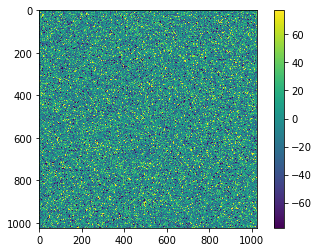

In [5]:
res = full-full2
plt.figure()
plt.imshow(full-full2, interpolation='none', vmin=np.percentile(res, 1), vmax=np.percentile(res, 99))
plt.colorbar()
plt.show()

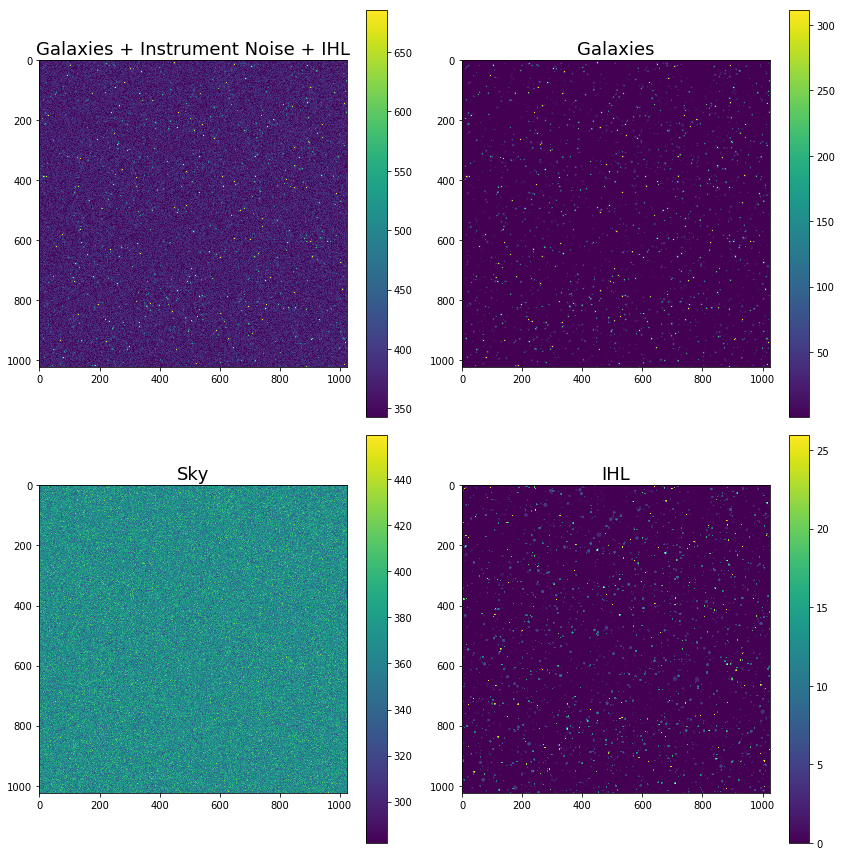

In [6]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Galaxies + Instrument Noise + IHL', fontsize=18)
plt.imshow(full, interpolation='none', vmin=np.percentile(full, 5), vmax=np.percentile(full, 99.9))
plt.colorbar()
# plt.xlim(0, 200)
# plt.ylim(0, 200)
plt.subplot(2,2,2)
plt.title('Galaxies', fontsize=18)
plt.imshow(srcs, interpolation='none', vmin=np.percentile(srcs, 5), vmax=np.percentile(srcs, 99.9))
plt.colorbar()
# plt.xlim(0, 200)
# plt.ylim(0, 200)
plt.subplot(2,2,3)
plt.title('Sky', fontsize=18)
plt.imshow(noise, interpolation='none')
plt.colorbar()
# plt.xlim(0, 200)
# plt.ylim(0, 200)
plt.subplot(2,2,4)
plt.title('IHL', fontsize=18)
plt.imshow(ihl, interpolation='none', vmin=np.percentile(ihl, 5), vmax=np.percentile(ihl, 99.9))
# plt.xlim(0, 200)
# plt.ylim(0, 200)
plt.colorbar()
plt.tight_layout()
# plt.savefig('../figures/cibermock_hsc_cat_zoom.png', bbox_inches='tight')
plt.show()

In [5]:
xarr, yarr, marr = cmock.get_catalog('../data/test_hsc_catalog.txt')
cat = np.array([xarr, yarr, marr]).transpose()
gal_map = make_galaxy_binary_map(cat, full)

Drawing 447 total galaxies from dN/dz..
('catalog has shape:', (447, 7))
Making source map TM, mrange=(0,5280), 144 sources


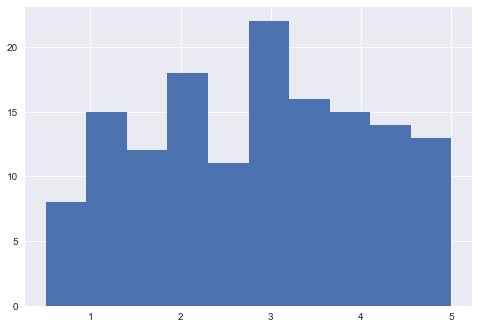

Drawing 447 total galaxies from dN/dz..
('catalog has shape:', (447, 7))
Making source map TM, mrange=(0,5280), 153 sources


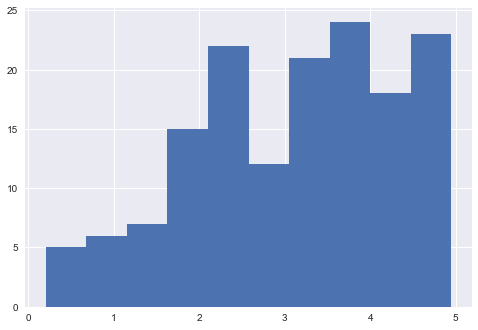

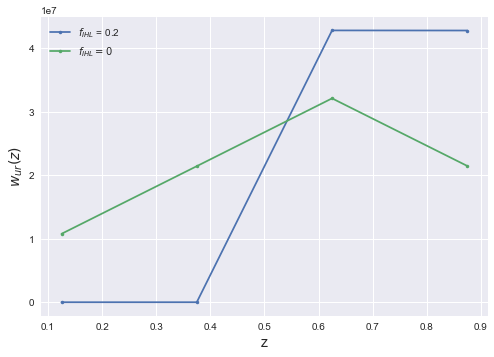

In [10]:
wints, zrange = integrated_xcorr_multiple_redshifts(nsrc=200, ihl_frac=0.2, nbin=5, zmax=1.0)
wints_noihl, zrange = integrated_xcorr_multiple_redshifts(nsrc=200, ihl_frac=0.0, nbin=5, zmax=1.0)



plt.figure()
plt.plot(zrange, wints, marker='.', label='$f_{IHL}$ = 0.2')
plt.plot(zrange, wints_noihl, marker='.', label='$f_{IHL}=0$')
plt.legend()
plt.xlabel('z', fontsize=14)
plt.ylabel('$w_{ur}(z)$', fontsize=14)
plt.show()


# full_wihl, srcs, noise, ihl = cmock.make_ciber_map(ifield, m_min, m_max, band=inst, catname ='test_hsc_catalog.txt', ihl_frac=0.3)
# integ = integrate_w_theta(rb, radprof)
# print(integ)
# full_noihl, srcs, noise = cmock.make_ciber_map(ifield, m_min, m_max, band=inst, catname ='test_hsc_catalog.txt', ihl_frac=0.0)

# xarr, yarr, marr = cmock.get_catalog('../data/test_hsc_catalog.txt')
# cat = np.array([xarr, yarr, marr]).transpose()
# gal_map = make_galaxy_binary_map(cat, full)



In [8]:
full, srcs, noise, ihl, gal_cat = cmock.make_ciber_map(ifield, m_min, 25, band=inst, nsrc=1000, ihl_frac=0.1)
rb, radprof, radstd = cross_correlate_galcat_ciber(full, gal_cat, magidx=5)
integ = integrate_w_theta(rb, radprof)
print(integ)


Drawing 4152 total galaxies from dN/dz..
('catalog has shape:', (4152, 7))
Making source map TM, mrange=(0,5280), 1310 sources
3803536853.9861994


Drawing 83048 total galaxies from dN/dz..
('catalog has shape:', (83048, 7))
Making source map TM, mrange=(0,5280), 26561 sources
Making source map TM, mrange=(0,5280), 26561 sources
Making source map TM, mrange=(0,5280), 26561 sources
Making source map TM, mrange=(0,5280), 26561 sources
Making source map TM, mrange=(0,5280), 26561 sources


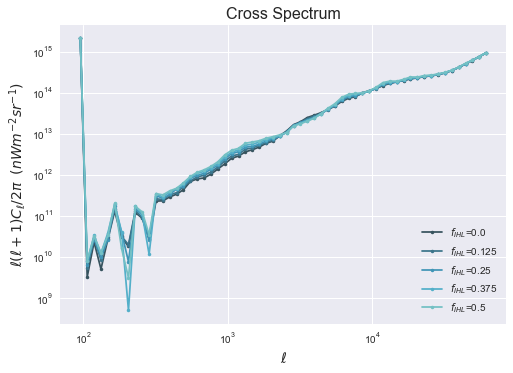

In [26]:
ihl_range, rbins, radprofs, radstds = xcorr_varying_ihl(nsrc=2000, m_max=25, nbins=5)
labels = ['$f_{IHL}$='+str(np.round(ihl, 3)) for ihl in ihl_range]
plot_radavg_xspectrum(rbins, radprofs=radprofs, labels=labels)

Drawing 83048 total galaxies from dN/dz..
('catalog has shape:', (83048, 7))
Making source map TM, mrange=(0,5280), 26632 sources
18.0
19.5
21.0
22.5
24.0


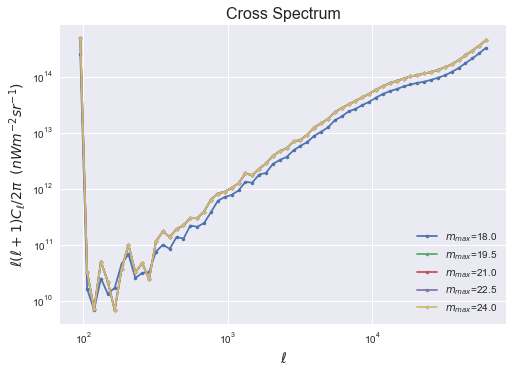

In [16]:
comp_range, rbins, radprofs, radstds = xcorr_varying_galcat_completeness(nsrc=20000, compmin=18.0, compmax=24, nbin=5)
labels = ['$m_{max}$='+str(np.round(comp, 3)) for comp in comp_range]
plot_radavg_xspectrum(rbins, radprofs=radprofs, labels=labels)

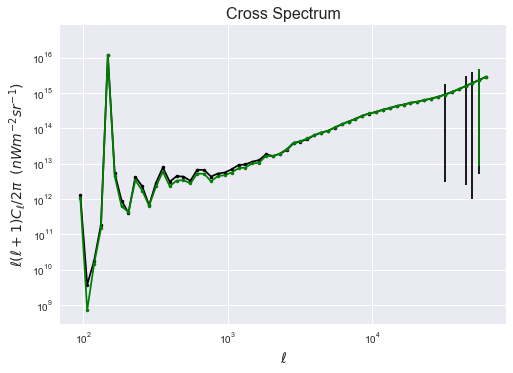

In [7]:
plot_radavg_xspectrum(rbins, radprof_wihl, radstd_wihl, radprof2=radprof_noihl, raderr2=radstd_noihl)

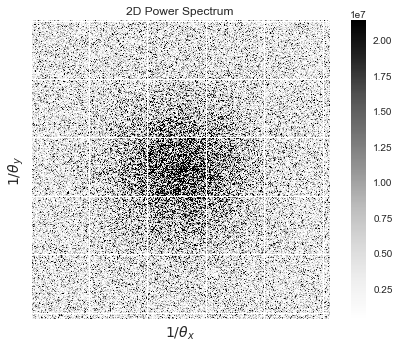

In [8]:
plot_2d_xspectrum(xcorr_wihl)

Drawing 22355 total galaxies from dN/dz..


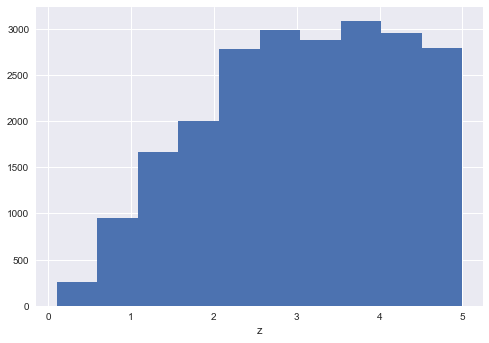

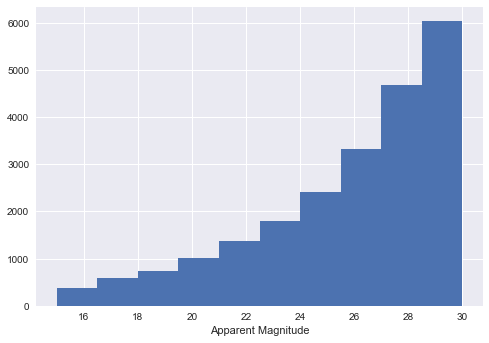

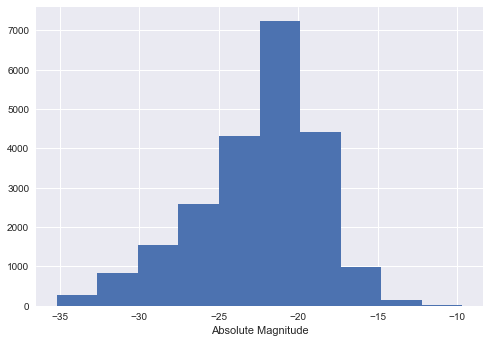

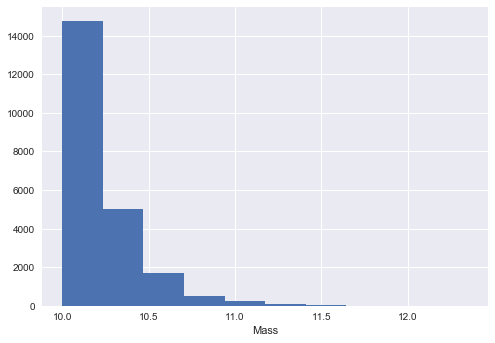

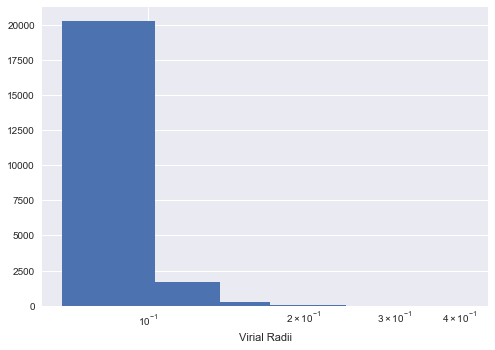

In [13]:

galclass = galaxy_catalog()
gal_cat = galclass.generate_galaxy_catalog(10000)


plt.figure()
plt.hist(gal_cat[:,2])
plt.xlabel('z')
plt.show()

plt.figure()
plt.hist(gal_cat[:,3])
plt.xlabel('Apparent Magnitude')
plt.show()

plt.figure()
plt.hist(gal_cat[:,4])
plt.xlabel('Absolute Magnitude')
plt.show()

plt.figure()
plt.hist(np.log10(gal_cat[:,5]))
plt.xlabel('Mass')
plt.show()

plt.figure()
plt.hist(gal_cat[:,6])
plt.xlabel('Virial Radii')
plt.xscale('log')
plt.show()

1671.83144655 Mpc
[46.2561812  46.2561812  46.2561812  ... 13.29869694 13.29869694
 13.29869694] Mpc
[12.02847489  9.55455723  9.55455723 ...  5.26709622  5.26709622
  5.26709622]
12.0284748923


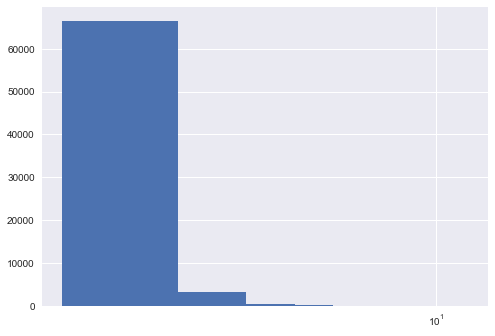

In [88]:
def virial_radius_2_reff(r_vir, zs, theta_fov_deg=2.0, npix_sidelength=1024.):
    d = cosmo.angular_diameter_distance(zs)*theta_fov_deg*np.pi/180.
    return (r_vir*u.Mpc/d)*npix_sidelength

npix = virial_radius_2_reff(gal_cat[:,4], gal_cat[:,0])
# npix = virial_radius_2_reff(virial_rad_2(gal_cat[:,3], gal_cat[:,0]).to(u.Mpc).value, gal_cat[:,0])
print(npix)
print(np.max(npix))

plt.figure()
plt.hist(npix)
plt.xscale('log')
plt.show()

In [86]:
ms, dndm = galclass.load_halo_mass_function('../data/halo_mass_function_hmfcalc.txt')

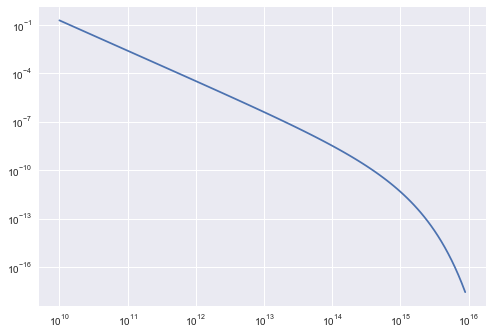

In [87]:
plt.figure()
plt.plot(ms, dndm)
plt.xscale('log')
plt.yscale('log')
plt.show()